In [1]:
from sympy import false

from ThermographyToolSet import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.ndimage import gaussian_filter

In [2]:
# Load the .mat file
data = loadmat('/Users/jaworskj/Desktop/Thermography_test_set/archive/Z_004.mat')
# Check keys if you are unsure about the variable name
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'imageArray', 'Fs', 'numberImages'])


In [3]:
thermography_data = data['imageArray']  # Adjust this to your dataset's variable name
# Inspect the shape of the data
print("Data shape:", thermography_data.shape)

Data shape: (256, 320, 1810)


In [4]:
#reorganizing data to match schemat of my prevous measurments
thermography_data=np.transpose(thermography_data,(2,0,1))
thermography_data.shape

(1810, 256, 320)

In [5]:
#clipping to square image
thermography_data=thermography_data[:,:,32:320-32]
thermography_data.shape

(1810, 256, 256)

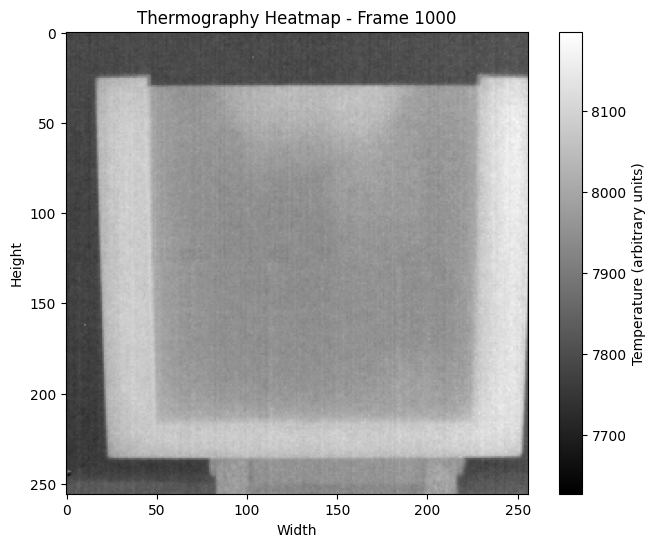

In [6]:
# Select a single frame (e.g., the first frame at index 0)
frame_index =1000
frame = thermography_data[frame_index,: , :]

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(frame, cmap='gray')  # Use 'hot' colormap for thermal data
plt.colorbar(label='Temperature (arbitrary units)')
plt.grid(False)
plt.title(f"Thermography Heatmap - Frame {frame_index}")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

In [7]:
phasegrame_data=phasegram(thermography_data)

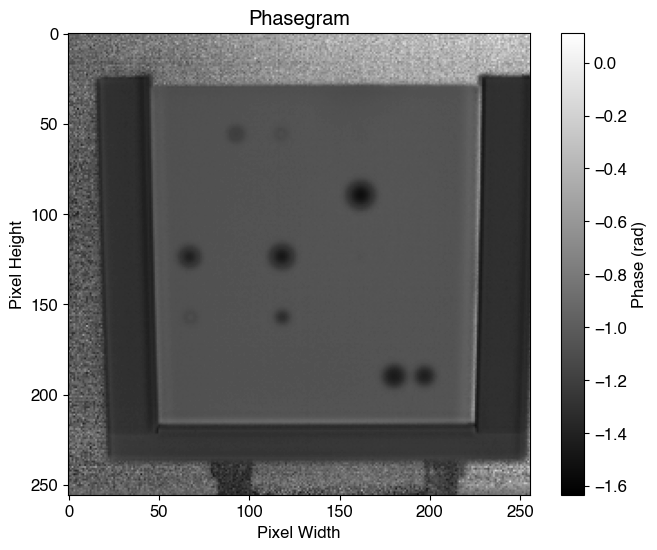

In [18]:
plt.rcParams['font.family'] = "Helvetica"
plt.rcParams['font.size'] = 12
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["ps.useafm"] = True

plt.figure(figsize=(8,6))
plt.imshow(phasegrame_data[7],cmap='gray')
plt.colorbar(label='Phase (rad)')
plt.grid(False)
plt.xlabel("Pixel Width")
plt.ylabel("Pixel Height")
plt.title("Phasegram")
#plt.savefig("example_phasegram.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [7]:
thermography_data.shape

(1810, 256, 256)

In [8]:
reshaped_thermography=thermography_data.reshape(thermography_data.shape[0],thermography_data.shape[1]*thermography_data.shape[2])
reshaped_thermography.shape

(1810, 65536)

In [9]:
reshaped_thremography=np.transpose(reshaped_thermography,(1,0))

In [10]:
reshaped_thremography.shape

(65536, 1810)

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca=PCA(n_components=3)
pca.fit(reshaped_thremography)

PCA(n_components=3)

In [13]:
PCT=pca.transform(reshaped_thremography)

In [14]:
PCT.shape

(65536, 3)

In [15]:
PCT=np.transpose(PCT,(1,0))
PCT=PCT.reshape(PCT.shape[0],thermography_data.shape[1],thermography_data.shape[2])

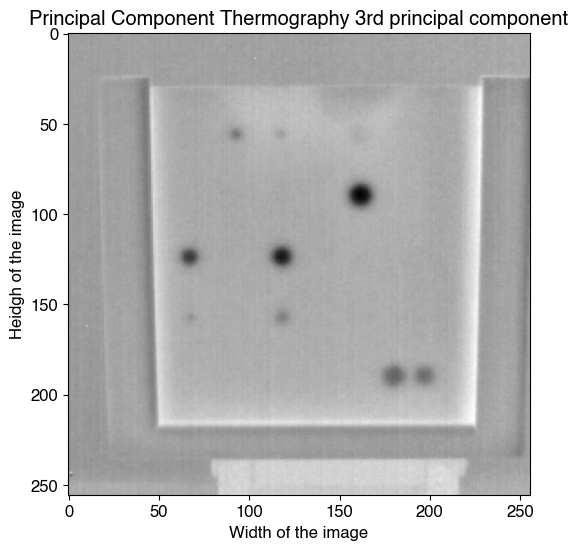

In [17]:
plt.rcParams['font.family'] = "Helvetica"
plt.rcParams['font.size'] = 12
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["ps.useafm"] = True

plt.figure(figsize=(8,6))
plt.imshow(PCT[2],cmap='gray')
plt.grid(False)
plt.title('Principal Component Thermography 3rd principal component')
plt.xlabel('Width of the image')
plt.ylabel('Heidgh of the image')
#plt.savefig("example_pct.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [7]:
PCT_data=PCT(thermography_data,3)

Text(0, 0.5, 'Heidgh of the image')

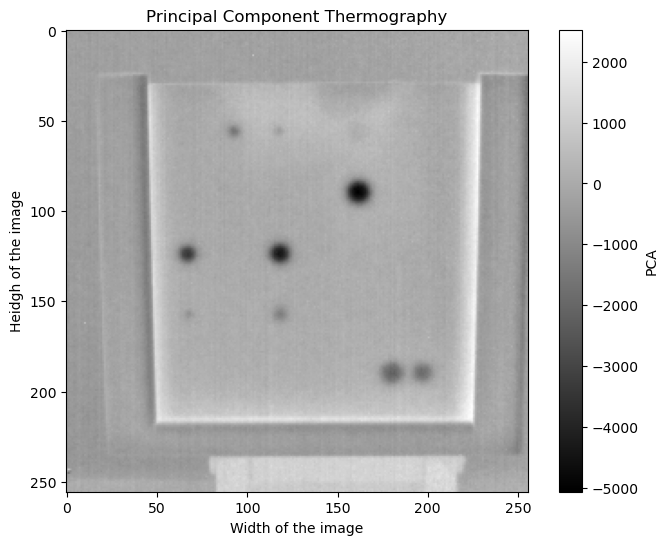

In [11]:
plt.figure(figsize=(8,6))
plt.imshow(PCT_data[2],cmap='gray')
plt.grid(False)
plt.colorbar(label='PCA')
plt.title('Principal Component Thermography')
plt.xlabel('Width of the image')
plt.ylabel('Heidgh of the image')
plt.show()

<h1>TSR

In [7]:
some_data_point=thermography_data[:,125,125]

In [8]:
x=np.linspace(1,thermography_data.shape[0],thermography_data.shape[0])

In [16]:
x_log=np.log(x)

In [10]:
some_data_point_log=np.log(some_data_point)

Text(0.5, 1.0, 'Temporal evolution in heatmap')

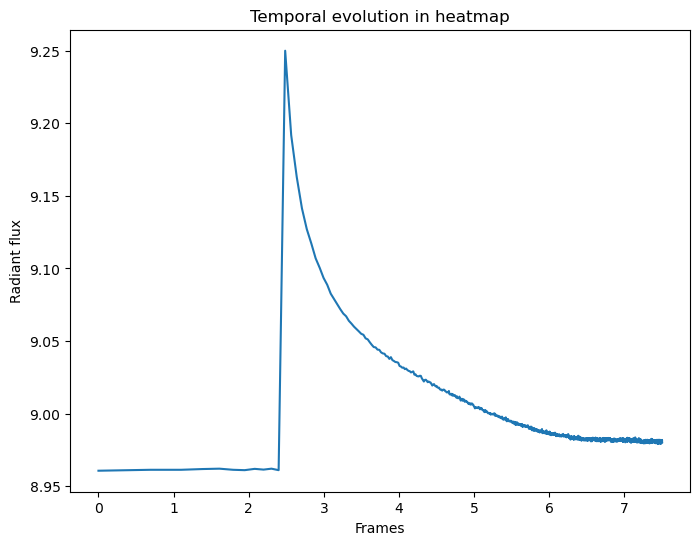

In [11]:
plt.figure(figsize=(8,6))
plt.plot(x_log,some_data_point_log)
plt.xlabel('Frames')
plt.ylabel('Radiant flux')
plt.title(label='Temporal evolution in heatmap')

In [26]:
def TSR(data,polynomial_order):
    x=np.linspace(1,data.shape[0],data.shape[0])
    x_log=np.log(x)

    coefficient_matrix=np.zeros(((polynomial_order+1,data.shape[1],data.shape[2])))
    for i in range(data.shape[1]):
        for j in range(data.shape[2]):
            coefficient_matrix[:,i,j]=np.polyfit(x_log,np.log(data[:,i,j]),polynomial_order)

    return coefficient_matrix

In [27]:
Experimental_data=TSR(thermography_data,polynomial_order=6)

In [69]:
thermography_data.shape

(1810, 256, 256)

In [63]:
Experimental_data.shape

(7, 256, 256)

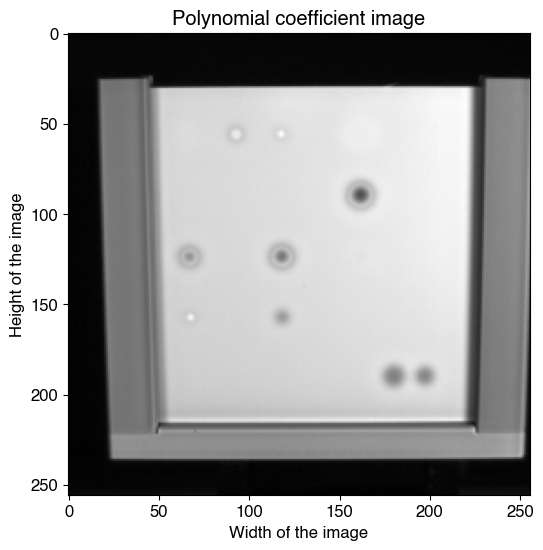

In [28]:
plt.rcParams['font.family'] = "Helvetica"
plt.rcParams['font.size'] = 12
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["ps.useafm"] = True
#plt.savefig("example_tsr.pdf", format="pdf", bbox_inches="tight")

plt.figure(figsize=(8,6))
plt.imshow(Experimental_data[2],cmap='gray')
plt.grid(False)
plt.xlabel('Width of the image')
plt.ylabel('Height of the image')
plt.title("Polynomial coefficient image")
#plt.savefig("example_tsr.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [36]:
def normalize_channel(channel):
    channel_min = np.min(channel)
    channel_max = np.max(channel)
    normalized = (channel - channel_min) / (channel_max - channel_min) * 255
    return normalized.astype(np.uint8)

In [65]:
red_channel=normalize_channel(Experimental_data[0])
green_channel=normalize_channel(Experimental_data[1])
blue_channel=normalize_channel(Experimental_data[2])

In [66]:
rgb_image = np.stack((red_channel, green_channel, blue_channel), axis=-1)

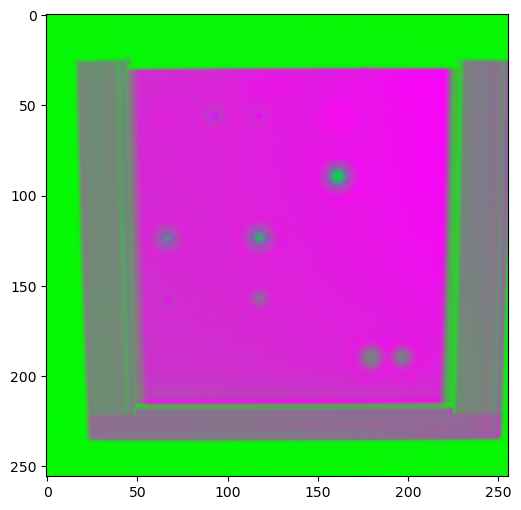

In [67]:
plt.figure(figsize=(8,6))
plt.imshow(rgb_image)

<h1>Highier Order Satistics

In [18]:
from scipy import stats

In [19]:
skew_test=stats.skew(thermography_data[:,100,100])

In [20]:
skew_test

8.232436308897816

In [21]:
kurtosis_test=stats.kurtosis(thermography_data[:,100,100])

In [22]:
kurtosis_test

97.99746801107132

In [23]:
skew_image=np.zeros((thermography_data.shape[1],thermography_data.shape[2]))

In [24]:
for i in range(thermography_data.shape[1]):
    for j in range(thermography_data.shape[2]):
        skew_image[i,j]=stats.skew(thermography_data[:,i,j])

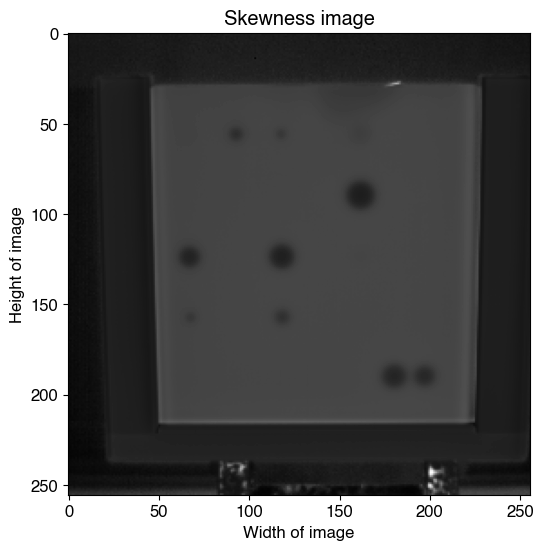

In [25]:
plt.rcParams['font.family'] = "Helvetica"
plt.rcParams['font.size'] = 12
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["ps.useafm"] = True

plt.figure(figsize=(8,6))
plt.imshow(skew_image,cmap='gray')
plt.title(label='Skewness image')
plt.xlabel('Width of image')
plt.ylabel('Height of image')
plt.savefig("example_hos.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [20]:
kurtosis_image=np.zeros((thermography_data.shape[1],thermography_data.shape[2]))

In [23]:
for i in range(thermography_data.shape[1]):
    for j in range(thermography_data.shape[2]):
        kurtosis_image[i,j]=stats.kurtosis(thermography_data[:,i,j])

Text(0, 0.5, 'Heidgh of image')

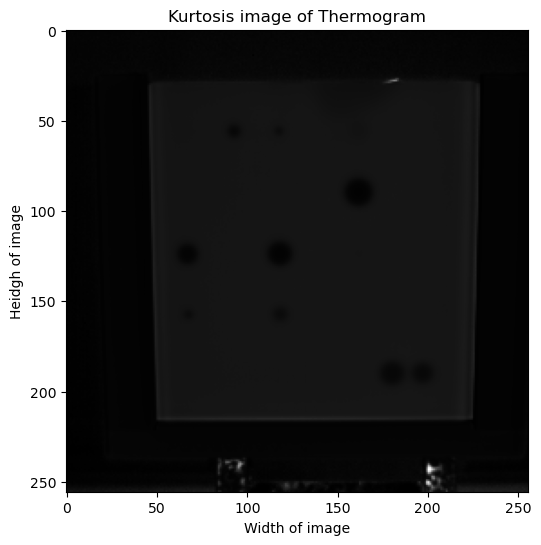

In [24]:
plt.figure(figsize=(8,6))
plt.imshow(kurtosis_image,cmap='gray')
plt.title(label='Kurtosis image of Thermogram')
plt.xlabel('Width of image')
plt.ylabel('Heidgh of image')

In [25]:
def fifth_standardized_central_moment(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    standardized_data = (data - mean) / std_dev
    moment_5th = np.mean(standardized_data**5)
    return moment_5th
fifth_moment=np.zeros((thermography_data.shape[1],thermography_data.shape[2]))
for i in range(thermography_data.shape[1]):
    for j in range(thermography_data.shape[2]):
        fifth_moment[i,j]=fifth_standardized_central_moment(thermography_data[:,i,j])

Text(0, 0.5, 'Heidgh of image')

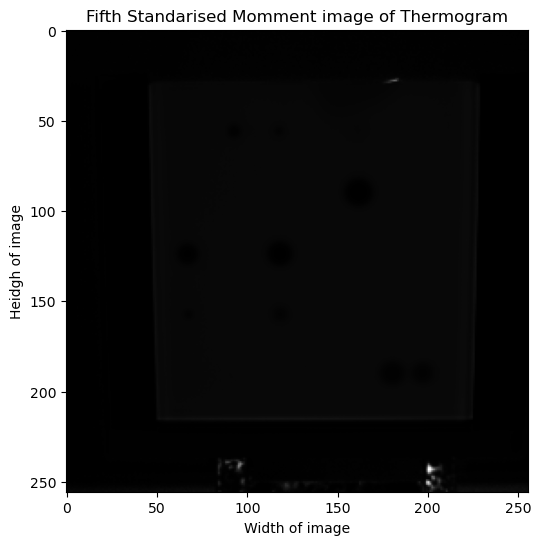

In [26]:
plt.figure(figsize=(8,6))
plt.imshow(fifth_moment,cmap='gray')
plt.title(label='Fifth Standarised Momment image of Thermogram')
plt.xlabel('Width of image')
plt.ylabel('Heidgh of image')

In [7]:
HOS_method=HOS(thermography_data)

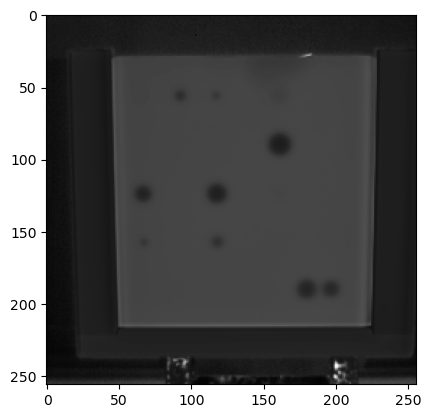

In [8]:
plt.imshow(HOS_method[0],cmap='gray')

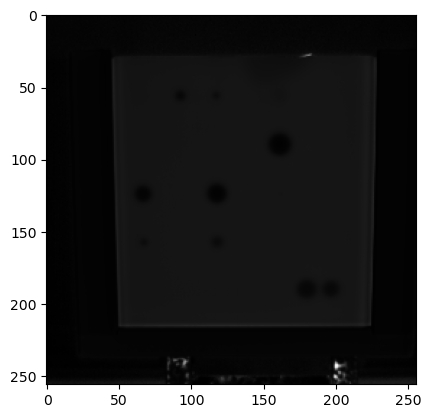

In [9]:
plt.imshow(HOS_method[1],cmap='gray')

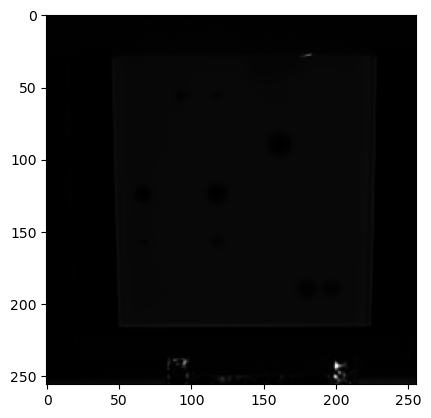

In [10]:
plt.imshow(HOS_method[2],cmap='gray')

<h1>Dynamic Mode decomposition

In [7]:
thermography_data.shape

(1810, 256, 256)

In [8]:
from scipy.linalg import svd, inv, eig

In [9]:
re_thermo=thermography_data.reshape(thermography_data.shape[0],thermography_data.shape[1]*thermography_data.shape[2])

In [10]:
re_thermo.shape

(1810, 65536)

In [11]:
dmd_ready=np.transpose(re_thermo,(1,0))
dmd_ready.shape

(65536, 1810)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [15]:
dmd_ready=scaler.fit_transform(dmd_ready)

In [18]:
x=dmd_ready[:,:-1]
x.shape

(65536, 1809)

In [19]:
x_p=dmd_ready[:,1:]
x_p.shape

(65536, 1809)

In [20]:
U,s,Vh=svd(x,full_matrices=False)

In [23]:
sigma=np.zeros((Vh.shape[0],Vh.shape[1]))
for i in range(Vh.shape[0]):
    sigma[i,i]=s[i]

In [24]:
sigma

array([[6.56886572e+03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.78816658e+02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.59627692e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.95440730e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.49259428e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.90726235e-01]])

In [25]:
U

array([[-0.00170955, -0.00475452,  0.00021729, ..., -0.00334874,
        -0.00784265,  0.00351147],
       [-0.00177155, -0.00499745,  0.00010038, ..., -0.00320111,
         0.00515537,  0.00059408],
       [-0.00172259, -0.00476665,  0.00023208, ..., -0.00025093,
        -0.00341997, -0.00278971],
       ...,
       [-0.00244652, -0.00642982,  0.00010881, ...,  0.00671351,
         0.00089919, -0.00341704],
       [-0.00239446, -0.00627543,  0.00015785, ...,  0.01182017,
        -0.0003901 ,  0.0008256 ],
       [-0.00242455, -0.00632259,  0.00017515, ...,  0.003901  ,
        -0.00431294, -0.00721971]])

In [26]:
r=5
U=U[:,:r]
Vh=Vh[:r,:]
sigma=sigma[:r,:r]

In [27]:
U.shape

(65536, 5)

In [28]:
Vh.shape

(5, 1809)

In [29]:
sigma.shape

(5, 5)

In [30]:
A_tylda=U.T@x_p@Vh.T@inv(sigma)

In [31]:
eig_val, eig_vec=eig(A_tylda)

In [32]:
omega=x_p@Vh.T@inv(sigma)@eig_vec

In [33]:
eig_val

array([0.84096696+0.j, 0.96488785+0.j, 0.99998603+0.j, 0.99478771+0.j,
       0.98348773+0.j])

In [34]:
omega.shape

(65536, 5)

In [35]:
omega_tr=np.transpose(omega,(1,0))
omega_tr.shape

(5, 65536)

In [36]:
omega_original=omega_tr.reshape(omega_tr.shape[0],thermography_data.shape[1],thermography_data.shape[2])
omega_original.shape

(5, 256, 256)

In [37]:
omega_original[1]

array([[-0.00097441, -0.00104319, -0.00094192, ..., -0.00141237,
        -0.00127294, -0.00126438],
       [-0.00097063, -0.00095707, -0.00096192, ..., -0.00122112,
        -0.00124371, -0.00113744],
       [-0.00095031, -0.00093862, -0.000866  , ..., -0.00124979,
        -0.00130288, -0.00130072],
       ...,
       [-0.0012498 , -0.00124748, -0.00121251, ..., -0.00137832,
        -0.0013797 , -0.00137741],
       [-0.0012964 , -0.0012546 , -0.00122554, ..., -0.00135678,
        -0.00135685, -0.00133931],
       [-0.00109979, -0.00124841, -0.00114419, ..., -0.00140933,
        -0.00138504, -0.00135785]])

In [38]:
np.angle(omega_original[1])

array([[3.14159265, 3.14159265, 3.14159265, ..., 3.14159265, 3.14159265,
        3.14159265],
       [3.14159265, 3.14159265, 3.14159265, ..., 3.14159265, 3.14159265,
        3.14159265],
       [3.14159265, 3.14159265, 3.14159265, ..., 3.14159265, 3.14159265,
        3.14159265],
       ...,
       [3.14159265, 3.14159265, 3.14159265, ..., 3.14159265, 3.14159265,
        3.14159265],
       [3.14159265, 3.14159265, 3.14159265, ..., 3.14159265, 3.14159265,
        3.14159265],
       [3.14159265, 3.14159265, 3.14159265, ..., 3.14159265, 3.14159265,
        3.14159265]])

In [39]:
np.abs(omega_original[1])

array([[0.00097441, 0.00104319, 0.00094192, ..., 0.00141237, 0.00127294,
        0.00126438],
       [0.00097063, 0.00095707, 0.00096192, ..., 0.00122112, 0.00124371,
        0.00113744],
       [0.00095031, 0.00093862, 0.000866  , ..., 0.00124979, 0.00130288,
        0.00130072],
       ...,
       [0.0012498 , 0.00124748, 0.00121251, ..., 0.00137832, 0.0013797 ,
        0.00137741],
       [0.0012964 , 0.0012546 , 0.00122554, ..., 0.00135678, 0.00135685,
        0.00133931],
       [0.00109979, 0.00124841, 0.00114419, ..., 0.00140933, 0.00138504,
        0.00135785]])

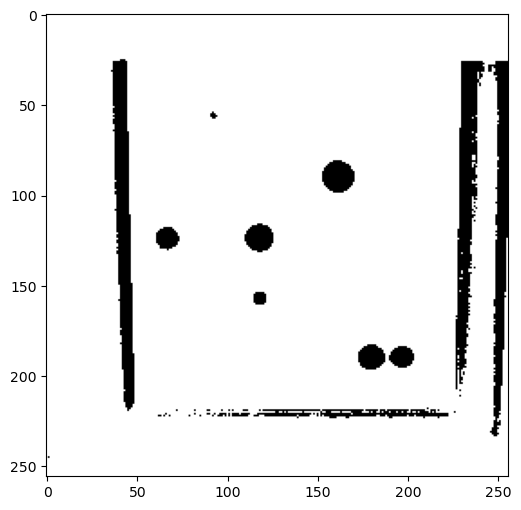

In [57]:
plt.figure(figsize=(8,6))
plt.imshow(np.angle(omega_original[4]),cmap='gray')

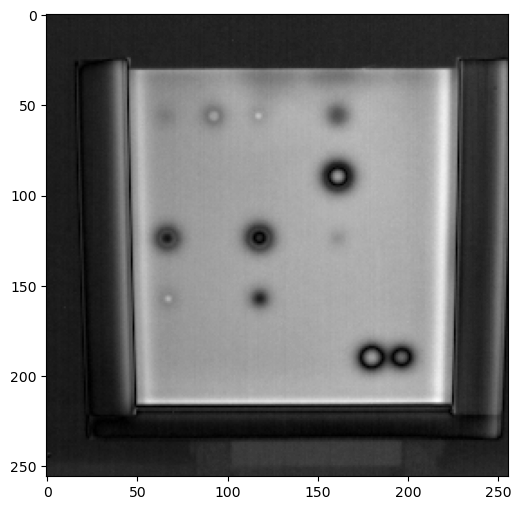

In [52]:
plt.figure(figsize=(8,6))
plt.imshow(np.abs(omega_original[1]),cmap='gray')

In [18]:
dmd_data=DMD(thermography_data,5)

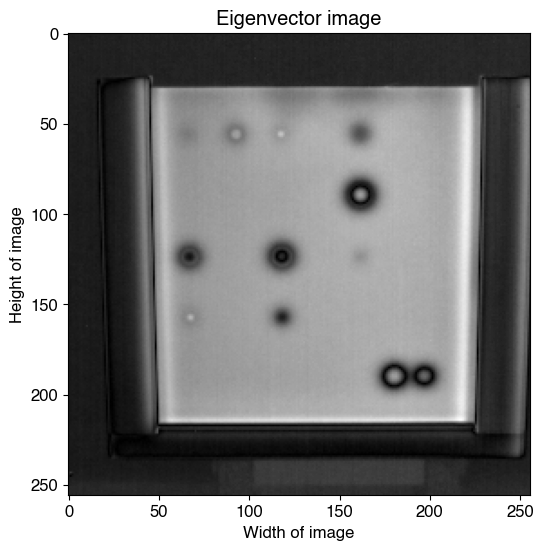

In [19]:
plt.rcParams['font.family'] = "Helvetica"
plt.rcParams['font.size'] = 12
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["ps.useafm"] = True
#plt.savefig("example_tsr.pdf", format="pdf", bbox_inches="tight")
plt.figure(figsize=(8,6))
plt.imshow(np.abs(dmd_data[1]),cmap='gray')
plt.xlabel("Width of image")
plt.ylabel("Height of image")
plt.title("Eigenvector image")
plt.savefig("example_dmd.pdf", format="pdf", bbox_inches="tight")
plt.show()

<h1>Wavelets analysis

In [7]:
import pywt

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler=MinMaxScaler()

In [10]:
thermography_data.shape

(1810, 256, 256)

In [11]:
original=thermography_data[700]
orriginal=scaler.fit_transform(original)
coeffs2 = pywt.dwt2(original, 'db1')

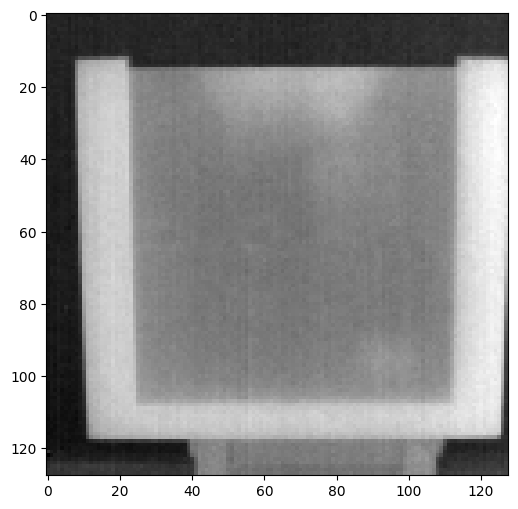

In [12]:
plt.figure(figsize=(8,6))
plt.imshow(coeffs2[0],cmap='gray')

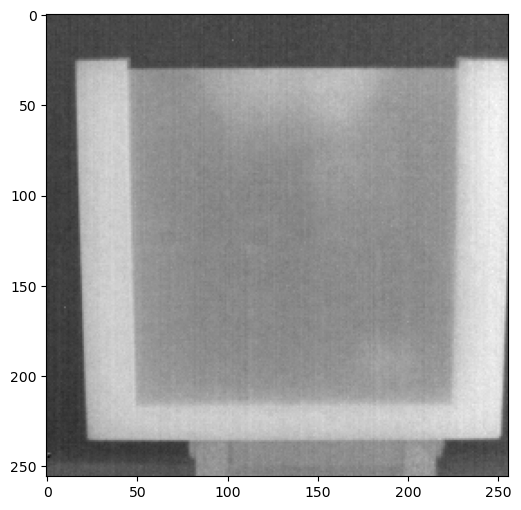

In [44]:
plt.figure(figsize=(8,6))
plt.imshow(original,cmap='gray')

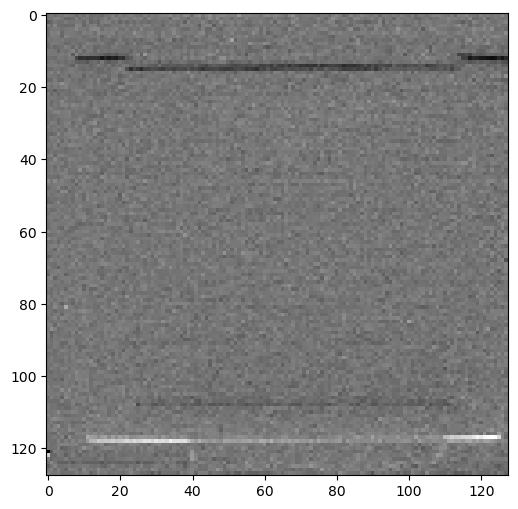

In [45]:
plt.figure(figsize=(8, 6))
plt.imshow(coeffs2[1][0], cmap='gray')

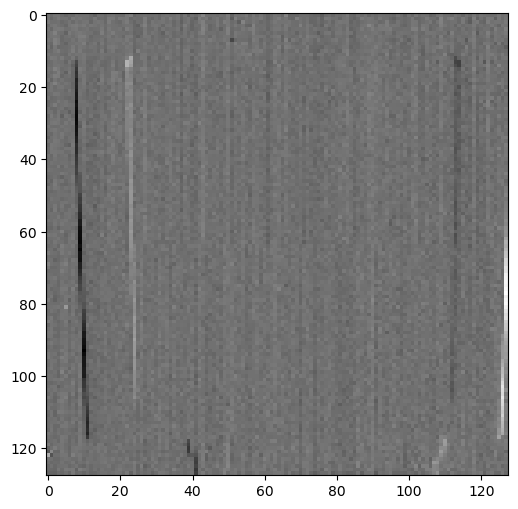

In [46]:
plt.figure(figsize=(8, 6))
plt.imshow(coeffs2[1][1], cmap='gray')

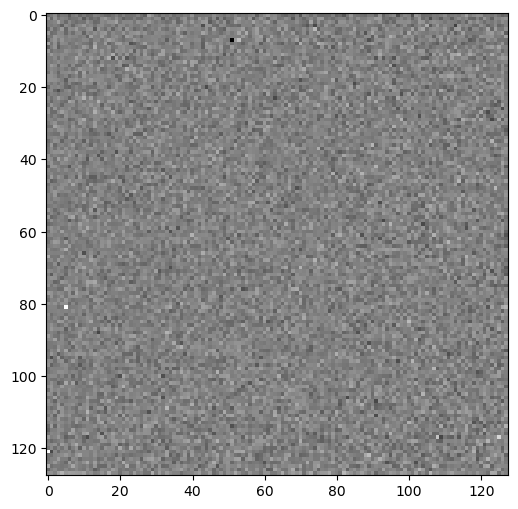

In [47]:
plt.figure(figsize=(8, 6))
plt.imshow(coeffs2[1][2], cmap='gray')

In [13]:
thermography_data.shape

(1810, 256, 256)

In [14]:
CA=np.zeros(((907,thermography_data.shape[1],thermography_data.shape[2])))
CD=np.zeros(((907,thermography_data.shape[1],thermography_data.shape[2])))

In [15]:
for i in range(thermography_data.shape[1]):
    for j in range(thermography_data.shape[2]):
        cA,cD=pywt.dwt(thermography_data[:,i,j],'sym3')
        CA[:,i,j]=cA
        CD[:,i,j]=cD

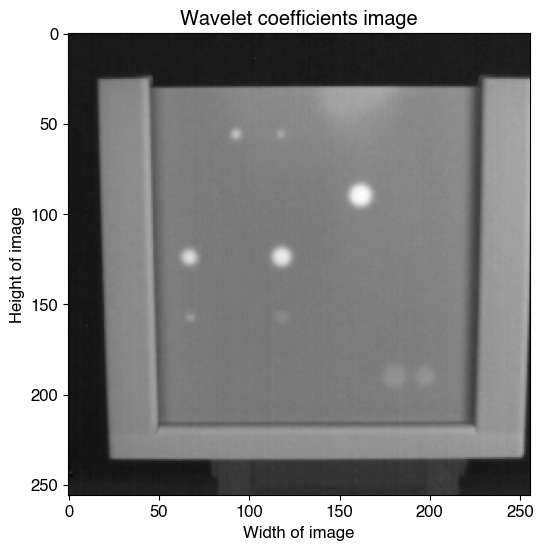

In [17]:
plt.rcParams['font.family'] = "Helvetica"
plt.rcParams['font.size'] = 12
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams["ps.useafm"] = True
#plt.savefig("example_tsr.pdf", format="pdf", bbox_inches="tight")


plt.figure(figsize=(8,6))
plt.imshow(CA[21],cmap='gray')
plt.xlabel('Width of image')
plt.ylabel('Height of image')
plt.grid(False)
plt.title('Wavelet coefficients image')
plt.savefig("example_wave.pdf", format="pdf", bbox_inches="tight")
plt.show()

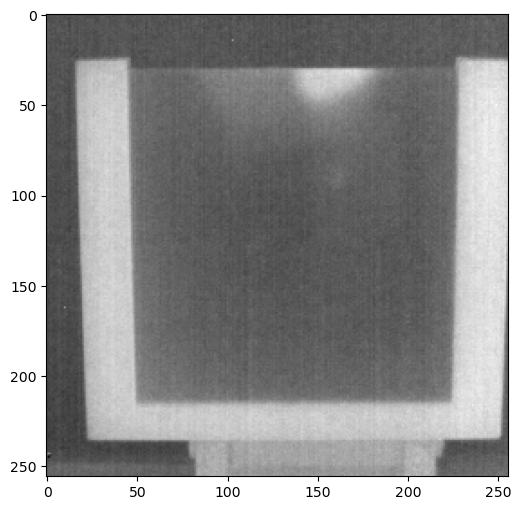

In [83]:
plt.figure(figsize=(8,6))
plt.imshow(thermography_data[9],cmap='gray')

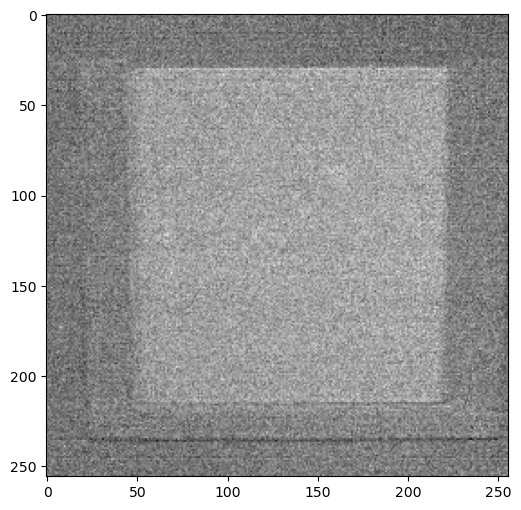

In [137]:
plt.figure(figsize=(8,6))
plt.imshow(CD[8],cmap='gray')

<h1>Propper wavelet analysis

In [79]:
wave_data=WAVELET1D(thermography_data,'db28',8)

/opt/miniconda3/lib/python3.12/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 8 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [80]:
wave_data.shape

(61, 256, 256)

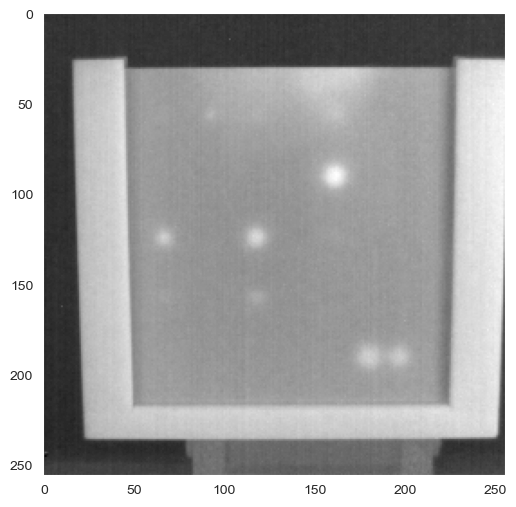

In [109]:
plt.figure(figsize=(8,6))
plt.imshow(wave_data[49],cmap='gray')
plt.grid(False)

In [101]:
x=np.arange(61)

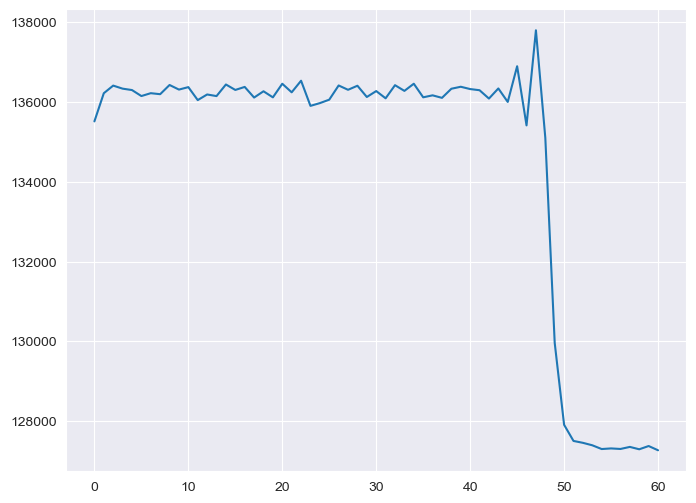

In [104]:
plt.figure(figsize=(8,6))
plt.plot(x,wave_data[:,75,75])